# Language Identifier Using Word Bigrams

Based on [asif31iqbal/language-identifier](https://github.com/asif31iqbal/language-identifier).

## 1. Importing libraries and creating a helper tokenize method

In [1]:
import pickle
import string
from nltk import ngrams, FreqDist, word_tokenize
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

This time, we use the third parameter of Python’s string `maketrans()` function to remove punctuation and digits when we tokenize.

In [2]:
def ultimate_tokenize(sentence):
    sentence = sentence.translate(str.maketrans('', '', string.punctuation + string.digits))
    return word_tokenize(sentence.lower())

## 2. Understanding the process

In [3]:
simple_example_text = 'Oh, then, I see Queen Mab hath been with you.'

simple_example_tokens_words = ultimate_tokenize(simple_example_text)
simple_example_tokens_words

['oh', 'then', 'i', 'see', 'queen', 'mab', 'hath', 'been', 'with', 'you']

In [4]:
simple_example_tokens_chars = list(simple_example_tokens_words[0])
simple_example_tokens_chars

['o', 'h']

In [5]:
simple_example_tokens_words_unigrams = list(ngrams(simple_example_tokens_words, 1))
simple_example_tokens_words_unigrams

[('oh',),
 ('then',),
 ('i',),
 ('see',),
 ('queen',),
 ('mab',),
 ('hath',),
 ('been',),
 ('with',),
 ('you',)]

In [6]:
simple_example_tokens_words_bigrams = list(
    ngrams(
        simple_example_tokens_words,
        2,
        pad_left=True,
        pad_right=True,
        left_pad_symbol='_',
        right_pad_symbol='_',
    )
)
simple_example_tokens_words_bigrams

[('_', 'oh'),
 ('oh', 'then'),
 ('then', 'i'),
 ('i', 'see'),
 ('see', 'queen'),
 ('queen', 'mab'),
 ('mab', 'hath'),
 ('hath', 'been'),
 ('been', 'with'),
 ('with', 'you'),
 ('you', '_')]

In [7]:
f_dist = FreqDist(simple_example_tokens_words_unigrams)
f_dist

FreqDist({('oh',): 1, ('then',): 1, ('i',): 1, ('see',): 1, ('queen',): 1, ('mab',): 1, ('hath',): 1, ('been',): 1, ('with',): 1, ('you',): 1})

In [8]:
unigram_dict = {}
for k, v in f_dist.items():
    unigram_dict[' '.join(k)] = v
unigram_dict

{'oh': 1,
 'then': 1,
 'i': 1,
 'see': 1,
 'queen': 1,
 'mab': 1,
 'hath': 1,
 'been': 1,
 'with': 1,
 'you': 1}

In [9]:
file = 'ngram_langid_files/LangId.train.English.txt'
with open(file, encoding='utf8') as f:
    content = f.read().lower()
print(content[:135])

approval of the minutes of the previous sitting 
the minutes of yesterday 's sitting have been distributed . 
are there any comments ? 


In [10]:
with open('ngram_langid_files/English.unigram.pickle', 'rb') as handle:
    unigram_words_english_dict = pickle.load(handle)

print('UNIGRAM FREQUENCIES')
print('the:', unigram_words_english_dict.get('the'))
print('i:', unigram_words_english_dict.get('i'))
print('defenestration:', unigram_words_english_dict.get('defenestration', 0))

UNIGRAM FREQUENCIES
the: 5699
i: 721
defenestration: 0


In [11]:
with open('ngram_langid_files/English.bigram.pickle', 'rb') as handle:
    bigram_words_english_dict = pickle.load(handle)

print('BIGRAM FREQUENCIES')
print('of the:', bigram_words_english_dict.get('of the'))
print('i am:', bigram_words_english_dict.get('i am'))
print('any comments:', bigram_words_english_dict.get('any comments'))

BIGRAM FREQUENCIES
of the: 906
i am: 76
any comments: 1


In [12]:
import operator

english_words_unigram_freqs = sorted(
    unigram_words_english_dict.items(), key=operator.itemgetter(1), reverse=True
)
english_words_unigram_freqs[:10]

[('the', 5699),
 ('of', 2769),
 ('to', 2490),
 ('and', 2040),
 ('in', 1668),
 ('a', 1343),
 ('is', 1303),
 ('that', 1205),
 ('this', 887),
 ('on', 865)]

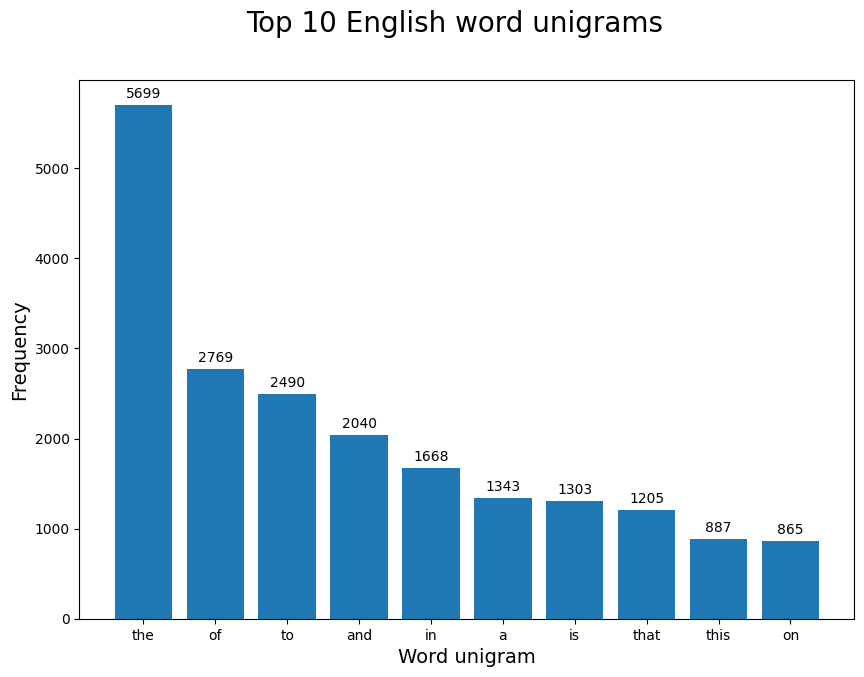

In [13]:
labels, values = zip(*english_words_unigram_freqs[:10])
indexes = arange(len(labels))
width = 0.8  # width = 1 would give bars that overlap because they are too close.

fig = plt.figure(figsize=(10, 7))
ax = fig.gca()  # Get current axis
rects = ax.bar(indexes, values, width)

fig.suptitle('Top 10 English word unigrams', fontsize=20)
plt.xlabel('Word unigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the value of each bar above it:
for rect in rects:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2.0,
        50 + height,
        '%d' % int(height),
        ha='center',
        va='bottom',
    )

# Remove the default x-axis tick numbers and use our own tick numbers:
ax.set_xticks(indexes)
# Replace the tick numbers with strings:
ax.set_xticklabels(labels)

plt.show()
# plt.savefig('top10EnglishWordUnigrams.png')

## 3. Generating unigram and bigram frequencies for English, French, and Italian from training files

In [14]:
def get_ngram_count_dict(tokens, n):
    if n == 1:
        n_grams = ngrams(tokens, n)
    else:
        n_grams = ngrams(
            tokens, n, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'
        )
    f_dist = FreqDist(n_grams)
    ngram_dict = {}
    for k, v in f_dist.items():
        ngram_dict[' '.join(k)] = v
    return ngram_dict


# Calls get_ngram_count_dict to get a unigram and bigram dict from file.
def get_word_unigram_bigram_dicts(file):
    with open(file, encoding='utf8') as f:
        content = f.read()
    tokens = ultimate_tokenize(content)
    word_unigram_dict = get_ngram_count_dict(tokens, 1)
    word_bigram_dict = get_ngram_count_dict(tokens, 2)
    return word_unigram_dict, word_bigram_dict


# Dumps the unigram and bigram dictionary of training data of the given language to .pickle files.
def dump_pickle(language):
    training_file = 'ngram_langid_files/LangId.train.' + language + '.txt'
    word_unigram_dict, word_bigram_dict = get_word_unigram_bigram_dicts(training_file)
    with open('ngram_langid_files/' + language + '.unigram.pickle', 'wb') as handle:
        pickle.dump(word_unigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('ngram_langid_files/' + language + '.bigram.pickle', 'wb') as handle:
        pickle.dump(word_bigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


dump_pickle('English')
dump_pickle('French')
dump_pickle('Italian')

We will need to know the number of sentences for each language in the training data. This is because of the method used to calculate probabilities (which incorporates the likelihood of the particular bigram among other bigrams starting with the same word) and the fact that we use padding for our bigrams.

In our training data, each line is a sentence, which is convenient for calculating the number of sentences. We could have already counted the lines in `get_word_unigram_bigram_dicts`. But we will do it separately for better clarity.

In [15]:
with open('ngram_langid_files/LangId.train.English.txt', 'rb') as f:
    number_of_sents_en = sum(1 for _ in f)
with open('ngram_langid_files/LangId.train.French.txt', 'rb') as f:
    number_of_sents_fr = sum(1 for _ in f)
with open('ngram_langid_files/LangId.train.Italian.txt', 'rb') as f:
    number_of_sents_it = sum(1 for _ in f)

print('NUMBER OF SENTENCES IN TRAINING DATA')
print('English:', number_of_sents_en)
print('French:', number_of_sents_fr)
print('Italian:', number_of_sents_it)

NUMBER OF SENTENCES IN TRAINING DATA
English: 2980
French: 2980
Italian: 2821


## 4. Identifying language for each line of the test file using bigram probabilities

In [16]:
with open('ngram_langid_files/English.unigram.pickle', 'rb') as handle:
    unigram_words_english_dict = pickle.load(handle)

with open('ngram_langid_files/English.bigram.pickle', 'rb') as handle:
    bigram_words_english_dict = pickle.load(handle)

with open('ngram_langid_files/French.unigram.pickle', 'rb') as handle:
    unigram_words_french_dict = pickle.load(handle)

with open('ngram_langid_files/French.bigram.pickle', 'rb') as handle:
    bigram_words_french_dict = pickle.load(handle)

with open('ngram_langid_files/Italian.unigram.pickle', 'rb') as handle:
    unigram_words_italian_dict = pickle.load(handle)

with open('ngram_langid_files/Italian.bigram.pickle', 'rb') as handle:
    bigram_words_italian_dict = pickle.load(handle)

vocabulary_size = (
    len(unigram_words_english_dict)
    + len(unigram_words_french_dict)
    + len(unigram_words_italian_dict)
)
vocabulary_size

22705

Below, we implement a formula for checking whether a given bigram list belongs to a specific language, using the bigram dictionary of said language.

First, we implement `get_bigram_probability()`, which checks the probability of a single bigram belonging to the language. The probability for each bigram is then used to calculate the overall probability of the list of bigrams belonging to the language in `get_language_probability()`.

In [17]:
# Get the probability that the given bigram belongs to the language that bigram_dict is in:
def get_bigram_probability(bigram, first_word, bigram_dict, first_word_dict):
    bigram_count = bigram_dict.get(bigram)
    if bigram_count is None:
        bigram_count = 0

    first_word_count = first_word_dict.get(first_word)
    if first_word_count is None:
        first_word_count = 0

    return (bigram_count + 1) / (vocabulary_size + first_word_count)


# Get the probability that a given bigram list is of a given language (specified by its bigram_dict):
def get_language_probability(bigram_list, first_words, bigram_dict, first_word_dict):
    result = 1.0
    index = 0
    for bigram in bigram_list:
        result *= get_bigram_probability(bigram, first_words[index], bigram_dict, first_word_dict)
        index += 1
    return result

`get_bigram_probability()` checks how many times the bigram appears in the bigram dictionary of the language and uses that to return the “probability” of it being the right language. This is not a probability in the mathematical sense, since this function does not consider the bigram frequencies of the other languages in question.

The formula used by `get_bigram_probability()`, $ \frac{bigram\_count + 1}{vocabulary\_size + first\_word\_count} $, is a “common-sense” formula that takes into account all the relevant parameters. $ vocabulary\_size $ is in the denominator because the larger this is, the less significant it is that the bigram appears a certain number of times in this particular language. As for $ first\_word\_count $, it provides a way to compare this bigram against other bigrams in this language that start with the same word. If the bigram does not appear at all in the dictionary, note how we end up assigning a small probability of $ \frac{1}{vocabulary\_size} $ of it belonging to the language.

Finally, this formula makes sure that we give more weight to the number of times the bigram exists in the dictionary, rather than whether it is the usual bigram given a certain first word. E.g., consider the bigram “le monsieur”. In the English dictionary, let’s say the bigram appears once, and “le” also appears once, while in French, “le monsieur” appears 100 times, and “le” appears 5,000 times. The probability for English would be $ \frac{1 + 1}{20000 + 1} \approx 0.0001 $, and for French, $ \frac{100 + 1}{20000 + 5000} \approx 0.004 $. Note that the probability for French is higher but still low because $ \frac{100}{5000} $ is quite low, and maybe it’s not French after all if, in French, “le” is usually followed by other words.

We now proceed with calculating the probability of each line of the test file being in English, French, and Italian, and then classify it as belonging to the language with the highest probability. Finally, we calculate the accuracy of our language identifier by comparing its predictions against the list of correct solutions.

In [18]:
# Load correct solutions:
solution_dict = {}
with open('ngram_langid_files/LangId.sol.txt') as f:
    for line in f:
        (key, val) = line.split()
        solution_dict[int(key)] = val

line_no = 1
result_dict = {}
correct = 0
incorrect_line_numbers = []

# We are using padding for bigrams, so we need to adjust the unigram dicts accordingly:
unigram_words_english_dict['_'] = number_of_sents_en
unigram_words_french_dict['_'] = number_of_sents_fr
unigram_words_italian_dict['_'] = number_of_sents_it

with open('ngram_langid_files/LangId.test.txt', encoding='utf8') as f:
    for line in f:
        tokens = ultimate_tokenize(line)
        word_bigrams = ngrams(
            tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'
        )
        word_bigram_list = []
        first_words = []
        for b in word_bigrams:
            word_bigram_list.append(' '.join(b))
            first_words.append(b[0])
        # word_bigrams format: [('_', 'this'), ...], word_bigram_list format: ['_ this', ...]

        english_prob = get_language_probability(
            word_bigram_list, first_words, bigram_words_english_dict, unigram_words_english_dict
        )
        french_prob = get_language_probability(
            word_bigram_list, first_words, bigram_words_french_dict, unigram_words_french_dict
        )
        italian_prob = get_language_probability(
            word_bigram_list, first_words, bigram_words_italian_dict, unigram_words_italian_dict
        )

        max_prob = max(english_prob, french_prob, italian_prob)
        if max_prob == english_prob:
            result_dict[line_no] = 'English'
        elif max_prob == french_prob:
            result_dict[line_no] = 'French'
        else:
            result_dict[line_no] = 'Italian'

        if solution_dict[line_no] == result_dict[line_no]:
            correct += 1
        else:
            incorrect_line_numbers.append(line_no)

        line_no += 1

# Storing results from result_dict to file:
with open('ngram_langid_files/LangId.result.txt', 'w') as f:
    for key, val in result_dict.items():
        f.write(' '.join([str(key), val]) + '\n')

print('Accuracy: {:2.2f}%'.format(correct * 100 / len(solution_dict)))

Accuracy: 98.00%


In [19]:
print('Line numbers for incorrectly classified languages: {}'.format(str(incorrect_line_numbers)))

Line numbers for incorrectly classified languages: [24, 87, 187, 191, 247, 279]


## 5. Testing with our own sentence

In [20]:
sent = "This is not a sentence."
sent_tokens = ultimate_tokenize(sent)
sent_bigrams_pre = ngrams(
    sent_tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'
)
sent_bigrams = []
sent_bigrams_first_words = []
for b in sent_bigrams_pre:
    sent_bigrams.append(' '.join(b))
    sent_bigrams_first_words.append(b[0])

print('Sentence bigrams:', sent_bigrams)
print('Sentence bigrams first words:', sent_bigrams_first_words)

Sentence bigrams: ['_ this', 'this is', 'is not', 'not a', 'a sentence', 'sentence _']
Sentence bigrams first words: ['_', 'this', 'is', 'not', 'a', 'sentence']


In [21]:
sent_english_prob = get_language_probability(
    sent_bigrams, sent_bigrams_first_words, bigram_words_english_dict, unigram_words_english_dict
)
sent_french_prob = get_language_probability(
    sent_bigrams, sent_bigrams_first_words, bigram_words_french_dict, unigram_words_french_dict
)
sent_italian_prob = get_language_probability(
    sent_bigrams, sent_bigrams_first_words, bigram_words_italian_dict, unigram_words_italian_dict
)

print('RAW "PROBABILITIES"')
print('English:', sent_english_prob)
print('French:', sent_french_prob)
print('Italian:', sent_italian_prob)

RAW "PROBABILITIES"
English: 3.789609056931767e-22
French: 6.29532898744646e-27
Italian: 6.203912252392846e-27


As we can see, the probabilities are arbitrary. However, we can convert them to percentages since we are classifying only among these three languages.

In [22]:
def get_normalized_probabilities(list_of_probabilities):
    sum_of_probabilities = sum(list_of_probabilities)
    result = []
    for probability in list_of_probabilities:
        result.append(probability / sum_of_probabilities)
    return result


probabilities = [sent_english_prob, sent_french_prob, sent_italian_prob]
normalized_probabilities = get_normalized_probabilities(probabilities)

print('RELATIVE PROBABILITIES')
print('English: ', round(normalized_probabilities[0] * 100, 2), '%', sep='')
print('French: ', round(normalized_probabilities[1] * 100, 2), '%', sep='')
print('Italian: ', round(normalized_probabilities[2] * 100, 2), '%', sep='')

RELATIVE PROBABILITIES
English: 100.0%
French: 0.0%
Italian: 0.0%


**PS:** For a state-of-the-art Greek dialect classifier using n-grams, take a look at [hb20007/greek-dialect-classifier](https://github.com/hb20007/greek-dialect-classifier).